In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import numpy as np

%matplotlib inline  

Loading references as previously extracted:

In [2]:
references = pd.read_csv('data/References.csv', index_col=0)

In [3]:
references.head()

,ref,file,ref_parsed,year,identifier
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni..."
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (..."
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish..."
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act..."
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip..."


Some sample references, and their corresponding identifier:

In [4]:
sample = references[['ref', 'identifier']].sample(4)
[print("ref: ",r, '\nidentifier: ', s,) for r, s in zip(sample.ref.tolist(), sample.identifier.tolist())]

ref:  Zacharia, Z. C., Olympiou, G., & Papaevripidou, M. (2008). Effects of experimenting with physical and virtual manipulatives on students' conceptual understanding in heat and temperature. Journal of Research in Science Teaching, 45(9), 1021-1035. 
identifier:  Zacharia, Z. C., Olympiou, G., & Papaevripidou, M. (2008). Effects of experimenting with physical and virtual manipulatives on students' conceptual understanding in heat and temperature
ref:  Popper, K. (1978). Three worlds. Paper presented at the Tanner Lecture on Human Values, University of Michigan, April 7, 1978. 
identifier:  Popper, K. (1978). Three worlds
ref:  Norooz, L., Mauriello, M. L., Jorgensen, A., McNally, B., & Froehlich, J. E. (2015, April). BodyVis: A New Approach to Body Learning Through Wearable Sensing and Visualization. In Proceedings of the 33rd Annual ACM Conference on Human Factors in Computing Systems (pp. 1025-1034). New York, NY: ACM. 
identifier:  Norooz, L., Mauriello, M. L., Jorgensen, A., McNa

[None, None, None, None]

### First we check the most cited citations:

Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation                                          32
Scardamalia, M. (2002). Collective cognitive responsibility for the advancement of knowledge                                   32
Jordan, B., & Henderson, A. (1995). Interaction analysis: Foundations and practice                                             31
Scardamalia, M., & Bereiter, C. (2006). Knowledge building: Theory, pedagogy, and technology                                   23
Papert, S. (1980). Mindstorms: Children, computers, and powerful ideas                                                         20
Barron, B. (2003). When smart groups fail                                                                                      19
Bereiter, C. (2002). Education and mind in the knowledge age                                                                   16
Vygotsky, L. S. (1978). Mind in society: The development of higher psychological processes

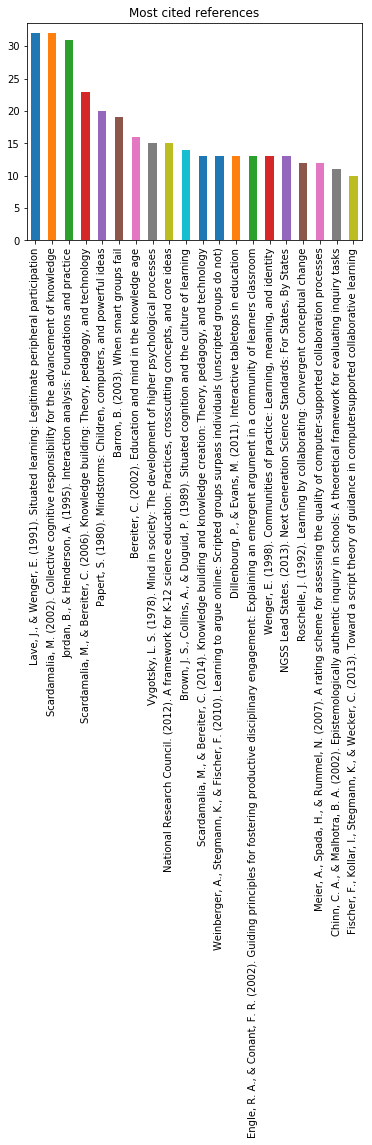

In [5]:
plt.title('Most cited references')
references.identifier.value_counts().head(20).plot(kind='bar')
references.identifier.value_counts().head(10)

### We look at how the references are distributed over the years:

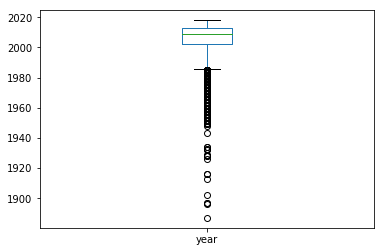

In [6]:
references.year.plot(kind='box')

### Looking at authors in dataset & the ones they reference

Load the metadata:

In [7]:
metadata = pd.read_csv('data/Parsed_metadata.csv', index_col=0)

In [8]:
reference_authors = pd.read_csv('data/Reference_authors.csv', index_col=0)
reference_authors.shape

(34668, 6)

In [9]:
reference_authors.drop_duplicates(inplace=True)
reference_authors.shape

(34644, 6)

In [10]:
reference_authors.head()

,ref,file,ref_parsed,year,identifier,author
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni...",Lave J.
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",Miles M. B.
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",Pea R. D.
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act...",Rogoff B.
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",Shirk J.


We check the most cited author:

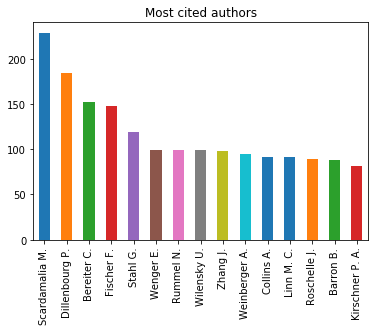

In [11]:
plt.title('Most cited authors')
reference_authors.author.value_counts().head(15).plot(kind='bar')

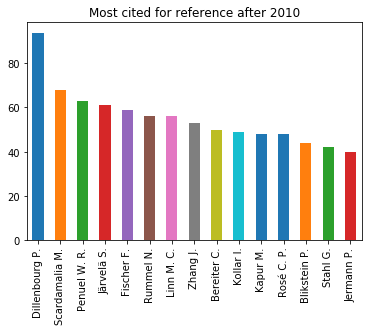

In [12]:
plt.title('Most cited for reference after 2010')
reference_authors[reference_authors.year > 2010].author.value_counts().head(15).plot(kind='bar')

We now merge on the shortened name as it can be found in the citation.

**Note** that we might get illegitemate merges, as the short name is not unique, even within the metadata dataset!

In [13]:
reference_edges = pd.merge(metadata, reference_authors, on='file')

reference_edges.sample(2)

,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,long_name,author_order,shortend_names,ref,ref_parsed,year,identifier,author
16219,import2015full_268,"['CSCL', 'social ability', 'collective efficac...",en,https://doi.dx.org/10.22318/cscl2015.268,Book chapter,International Society of the Learning Science...,Modeling Performance in Asynchronous CSCL: An ...,2015-07,2017-06-19 14:15:51+00:00,"Xing, W., Kim, S. M., & Goggins, S. (2015). Mo...",2017-06-19 14:15:51+00:00,Previous studies have invested effort in under...,"Kim, So Mi",1,Kim S. M.,"Xing, W. L. Wadholm, B. & Goggins, S. (2014d)....","Xing, W. L. Wadholm, B. & Goggins, S. (2014d)",2014.0,"Xing, W. L. Wadholm, B. & Goggins, S. (2014d)....",Goggins S.
105121,import2018_278,"['interdisciplinary', 'multivocal', 'multilite...",en,https://doi.dx.org/10.22318/cscl2018.1290,Book chapter,International Society of the Learning Science...,Life-long Life-wide Learning within and Beyond...,2018-07,2018-11-04 23:27:28+00:00,"Herrenkohl, L. R., Lund, K. S., Polman, J. L.,...",2018-11-04 23:27:28+00:00,Does the learning sciences community need to q...,"Polman, Joseph L",2,Polman J. L.,"Shapiro, R. B., Kelly, A., Ahrens, M., & Fiebr...","Shapiro, R. B., Kelly, A., Ahrens, M., & Fiebr...",2016.0,"Shapiro, R. B., Kelly, A., Ahrens, M., & Fiebr...",Shapiro R. B.


In [14]:
reference_edges.rename(columns={'shortend_names': 'author', 'author': 'cited'}, inplace=True)

#### Self citations:

In [15]:
reference_edges[reference_edges.author == reference_edges.cited].author.value_counts().head()

Zhang J.           53
Dillenbourg P.     48
Scardamalia M.     44
Rummel N.          43
Trausan-Matu S.    34
Name: author, dtype: int64

### Number of authors in and out of conference

In and out of conference citations, quick calculation:

In [16]:
print('Number of distinct authors ', len(reference_edges.author.unique()))
print('Number of distinct cited authors by some author in the conference ', len(reference_edges.cited.unique()))
print('Number of authors that where cited by an other author in the confernce :' , len(set(reference_edges.cited.tolist()).intersection(set(reference_edges.author.tolist()))))

Number of distinct authors  1892
Number of distinct cited authors by some author in the conference  13047
Number of authors that where cited by an other author in the confernce : 1009


In [17]:
reference_edges = reference_edges[['cited', 'author', 'year', 'ref']][reference_edges.year.notna()]

In [18]:
match_conference = ' JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer Supported Collaborative Learning'
re.search(match_conference,' ICLS')

<re.Match object; span=(1, 5), match='ICLS'>

In [19]:
mask_c_s = reference_edges.ref.map(lambda x: True if re.search(match_conference, x) else False)

In [20]:
in_conference = set(reference_edges[mask_c_s].cited.unique())

We limit the range of years to get people that are still "active"

In [21]:
not_in_conference = list(set(reference_edges[reference_edges.year > 2010].cited) - in_conference.union(set(reference_edges.author)))

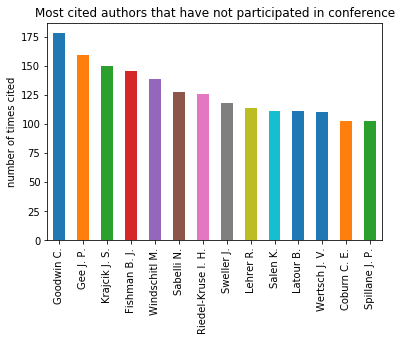

In [22]:
plt.title('Most cited authors that have not participated in conference')
plt.ylabel('number of times cited')
reference_edges[reference_edges.cited.isin(not_in_conference)].cited.value_counts().head(14).plot(kind = 'bar')

In [23]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Goodwin C.')].ref.sample(4).tolist()

['Goodwin, C. (2017). Co-operative action. New York: Cambridge University Press.',
 'Goodwin, C. (2007). Participation, stance and affect in the organization of activities. Discourse & Society, 18(1, Special issue: Morality as family practice), 53–73.',
 'Goodwin, C. (2003). The semiotic body in its environment. In J. Coupland & R. Gwyn (Eds.), Discourses of the body (pp. 19-42). New York: Palgrave/Macmillan.',
 'Goodwin, C. (2013). The co-operative, transformative organization of human action and knowledge. Journal of Pragmatics, 46(1), 8-23.']

In [24]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Gee J. P.')].ref.sample(4).tolist()

['Gee, J. P. (2007). Good videogames and good learning: Collected essays on video games. New York, NY: Peter Lang Publishing.',
 'Gee, J. P. (2007). What video games have to teach us about learning and literacy. Second edition. New York: Palgrave Macmillan.',
 "Gee, J. P. (2005). Semiotic social spaces and affinity spaces: From the age of mythology to today's schools. In D. Barton & K. Tusting (Eds.), Beyond communities of practice: Language, power and social context (pp. 214–232). Cambridge, UK: Cambridge University Press.",
 'Gee, J. P., & Hayes, E. (2012). Nurturing affinity spaces and game-based learning. In C. Steinkuehler, K. Squire, & S. Barab (Eds.), Games, learning, and society: Learning and meaning in the digital age (pp. 129–153). New York, NY: Cambridge University Press.']

# Building the refrence graph:

directed graph weighted by number of times x cited y:

In [27]:
nodes = pd.DataFrame(reference_edges.author.drop_duplicates().reset_index(drop=True)).reset_index()

In [29]:
nodes.head()

,index,author
0,0,Abrahamson D.
1,1,Shayan S.
2,2,Bakker A.
3,3,Schaaf M. F.
4,4,DeLiema D.


In [30]:
edges = pd.merge(nodes, reference_edges, left_on='author', right_on='cited')

In [31]:
author_dict = nodes.author.to_dict()
author_dict = {v: k for k, v in author_dict.items()}

In [32]:
edges['author'] = edges.author_x.map(author_dict)
edges['citation'] = edges.author_y.map(author_dict)

In [33]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
    if np.isnan(row.author):
        continue
    i, j = int(row.author), int(row.citation)
    adjacency[j, i] += 1

In [34]:
adjacency.shape

(1892, 1892)

In [35]:
degrees = np.where(adjacency > 0, 1, 0).sum(axis=0)

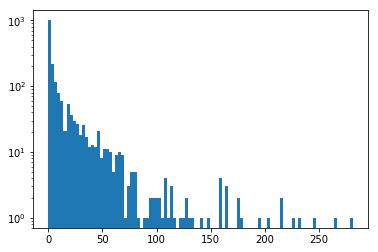

In [36]:
plt.hist(degrees, bins=100, log=True)
plt.show()

In [37]:
import networkx as nx

graph = nx.from_numpy_array(adjacency)

mapping = nodes.author.to_dict()

H=nx.relabel_nodes(graph,mapping)
print(sorted(H.nodes()))

nx.write_gexf(H, 'data/refrence_graph.gexf')

[' Adams', ' Barnes', ' Bedell', ' Ben', ' Clark', ' J.', ' J. Z.', ' M.', ' Swearingen', ' Virk', '-Horin H.', 'Aalst J.', 'Abdu R.', 'Abelein H.', 'Abelson H.', 'Abrahamson D.', 'Acharya A.', 'Acosta A.', 'Adams J. A.', 'Adams J. D.', 'Adanır G. A.', 'Addeh A.', 'Aditomo A.', 'Adleberg B.', 'Agarwal P.', 'Agrawal H.', 'Ahn J.', 'Ahonen A. K.', 'Ainsworth S.', 'AlQahtani M.', 'Alameh S.', 'Albrecht J.', 'Aleven V.', 'Allen C. D.', 'Allen L.', 'Allen S.', 'Allert H.', 'Almatrafi O.', 'Alozie N.', 'Alqassab M.', 'Alstyne R.', 'Amersfoort D.', 'Amici-Dargan S. L.', 'Amzalag M.', 'Anderson A.', 'Anderson C. G.', 'Anderson C. W.', 'Anderson E.', 'Anderson J.', 'Anderson J. L.', 'Anderson R. C.', 'Anderson R. K.', 'Anderson T. D.', 'Anderson-Levitt K.', 'Andrade A.', 'Andrews C. J.', 'Andrews J. J.', 'Angelo C.', 'Angelo S.', 'Angersbach J.', 'Anjewierden A.', 'Antle A. N.', 'Anton G.', 'Apollonia S.', 'Applebaum L.', 'Applebaum L. R.', 'Arastoopour G.', 'Archibeque B. A.', 'Arend B.', 'Ari